#파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

```
      파이토치는 넘파이처럼 연산한다.
      넘파이 = 텐서
```

## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

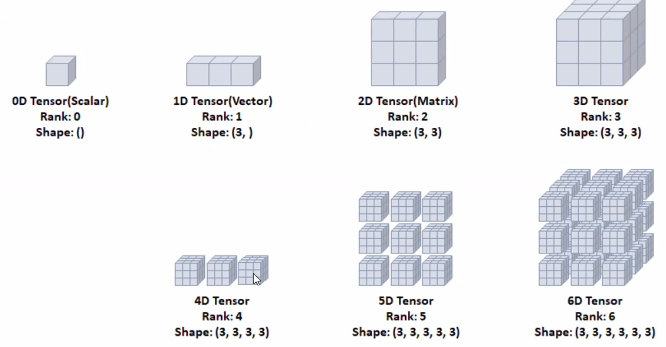

In [ ]:
import torch
torch.__version__

'1.13.0+cu116'

### 텐서 초기화와 데이터 타입

- 초기화되지 않은 텐서

In [ ]:
x = torch.empty(4,2)
x

tensor([[1.5131e-34, 0.0000e+00],
        [3.5032e-44, 0.0000e+00],
        [       nan, 6.4460e-44],
        [1.1578e+27, 7.1463e+22]])

In [ ]:
import numpy as np
x = np.empty([4,2])
x

array([[6.03907585e-316, 1.77863633e-322],
       [9.97338022e-313, 2.23674517e-046],
       [1.10156789e-094, 3.51757736e+180],
       [3.90842270e+160, 3.43135775e-315]])

- 무작위로 초기화된 텐서

In [ ]:
x = torch.rand(4,2)  #0~1사이의 숫자를 균등하게 생성
x

tensor([[0.3866, 0.0463],
        [0.1864, 0.3316],
        [0.7175, 0.0277],
        [0.7425, 0.9735]])

In [ ]:
x = np.random.rand(4,2)
x

array([[0.29585145, 0.97163699],
       [0.38668102, 0.43372434],
       [0.02745243, 0.74250026],
       [0.11171494, 0.58337879]])

- 데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [ ]:
x = torch.zeros(4,2,dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [ ]:
x = np.zeros((4,2))
x

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

- 사용자가 입력한 값으로 텐서 초기화

In [ ]:
x = torch.tensor([3,2,3])
x

tensor([3, 2, 3])

- 2 X 4 크기, double 타입, 1로 채워진 텐서

In [ ]:
x = x.new_ones(2,4,dtype=torch.double)
x 

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

- x와 같은 크기,float 타입, 무작위로 채워진 텐서


In [ ]:
#정규분포 randn,  같은 크기 like
x = torch.randn_like(x, dtype=torch.float)   #사이즈를 튜플로 입력하지 않고 기존의 텐서를 정의
x

tensor([[ 0.0293,  0.2757, -0.4296, -0.8118],
        [-0.9491,  0.2812,  0.5339, -0.5813]])

In [ ]:
x = torch.randn(5)  #평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성
x

tensor([-2.2967,  0.5459,  0.8193, -2.6096, -1.7780])

- 텐서의 크기 계산

In [ ]:
print(x.size())

torch.Size([2, 4])


### 데이터 타입(Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


In [ ]:
ft = torch.FloatTensor([1,2,3])
print(ft)
ft.dtype

tensor([1., 2., 3.])


torch.float32

In [ ]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [ ]:
it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [ ]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors

.to 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

```
NVIDIA가 만든 병렬 컴퓨팅 플랫폼 및 API 모델로, 보통 '쿠다'라고 발음한다. 
CUDA 플랫폼은 GPU 의 가상 명령어셋을 사용할 수 있도록 만들어주는 소프트웨어 레이어이며, 
NVIDIA가 만든 CUDA 코어가 장착된 GPU에서 작동
```

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.2266])
-1.2266008853912354
torch.float32


In [ ]:
#만약에 토치코다를 사용할 수 있으면 cuda를 사용하고 아니면 cpu를 사용해라.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### 다차원 텐서 표현

OD Tensor(Scalar)

- 하나의 숫자를 담고 있는 텐서(Tensor)
- 축과 형상이 없음

In [ ]:
t0 = torch.tensor(1)

print(t0.ndim)  #0차원
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(1)


1D Tensor(Vector)

- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재

In [ ]:
t1 = torch.tensor([1,2,3])

print(t1.ndim) 
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)

- 행렬과 같은 모양으로 두 개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

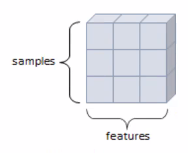

In [ ]:
t2 = torch.tensor([[1,2,3],[4,5,6]])

print(t2.ndim) 
print(t2.shape)
print(t2)

2
torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


3D Tensor

- 큐브(cube)와 같은 모양으로 세 개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 샘플(samples), 타입스탭(timesteps), 특성(features)을 가진 구조로 사용

### 텐서의 연산(Operations)

텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [ ]:
import math

a = torch.randn(1,2)*2 - 1 #가우시안 표준 정규 분포
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

#.clamp: 입력 값이 min < x(input) < max이면 x가 그대로 나오지만 
#min보다 작으면 min값이, max보다 크면 max값이 나오는 구조

tensor([[-5.7099,  0.2472]])
tensor([[5.7099, 0.2472]])
tensor([[-5.,  1.]])
tensor([[-6.,  0.]])
tensor([[-0.5000,  0.2472]])


In [ ]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,1])))

tensor([[-5.7099,  0.2472]])
tensor(-5.7099)
tensor(0.2472)
tensor(-2.7314)
tensor(4.2123)
tensor(-1.4113)
tensor([1, 2, 3])


- argmax: 최댓값을 가진 인덱스
- argmin: 최솟값을 가진 인덱스

      -> max와 min은 dim 인자를 줄 경우 argmax와 argmin도 함께 리턴

In [ ]:
x = torch.rand(2,2)
print(x, '\n')
print(x.max(dim=0), '\n') #열
print(x.max(dim=1)) #행

tensor([[0.0466, 0.6240],
        [0.1442, 0.2834]]) 

torch.return_types.max(
values=tensor([0.1442, 0.6240]),
indices=tensor([1, 0])) 

torch.return_types.max(
values=tensor([0.6240, 0.2834]),
indices=tensor([1, 1])) 



In [ ]:
x = torch.rand(2,2)
print(x, '\n')
print(x.min(dim=0), '\n') 
print(x.min(dim=1))

tensor([[0.3748, 0.8128],
        [0.7866, 0.2229]]) 

torch.return_types.min(
values=tensor([0.3748, 0.2229]),
indices=tensor([0, 1])) 

torch.return_types.min(
values=tensor([0.3748, 0.2229]),
indices=tensor([0, 1]))


In [ ]:
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)

tensor([[0.5646, 0.9681],
        [0.5114, 0.6255]])
tensor([[0.5902, 0.3098],
        [0.4960, 0.7685]])


- torch.add: 덧셈

In [ ]:
print(x+y)
print(torch.add(x, y))

tensor([[1.1547, 1.2779],
        [1.0073, 1.3940]])
tensor([[1.1547, 1.2779],
        [1.0073, 1.3940]])


In [ ]:
#결과 텐서를 인자로 제공

result = torch.empty(2,4)
torch.add(x, y, out = result)
print(result)

tensor([[1.1547, 1.2779],
        [1.0073, 1.3940]])


<ipython-input-48-836811862dd6>:4: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:17.)
  torch.add(x, y, out = result)


- in-place 방식: 텐서의 값을 변경하는 연산 뒤에는 "_"가 붙음

      x.copy_(y), x.t_()


In [ ]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[0.5646, 0.9681],
        [0.5114, 0.6255]])
tensor([[0.5902, 0.3098],
        [0.4960, 0.7685]])
tensor([[1.1547, 1.2779],
        [1.0073, 1.3940]])


- torch.sub: 뺄셈

In [ ]:
print(x)
print(y)
print(x-y, '\n')
x.sub_(y)
print(x)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[0.5646, 0.9681],
        [0.5114, 0.6255]])
tensor([[1.1547, 1.2779],
        [1.0073, 1.3940]])
tensor([[-0.5902, -0.3098],
        [-0.4960, -0.7685]]) 

tensor([[-0.5902, -0.3098],
        [-0.4960, -0.7685]])
tensor([[-1.7449, -1.5877],
        [-1.5033, -2.1625]])
tensor([[-1.7449, -1.5877],
        [-1.5033, -2.1625]])


- torch.mul: 곱셈

In [ ]:
print(x)
print(y)
print(x*y)
x.mul_(y)
print(x)
print()
print(torch.mul(x,y))
print(x.mul(y))

tensor([[-0.5902, -0.3098],
        [-0.4960, -0.7685]])
tensor([[1.1547, 1.2779],
        [1.0073, 1.3940]])
tensor([[-0.6815, -0.3959],
        [-0.4996, -1.0713]])
tensor([[-0.6815, -0.3959],
        [-0.4996, -1.0713]])

tensor([[-0.7870, -0.5059],
        [-0.5033, -1.4933]])
tensor([[-0.7870, -0.5059],
        [-0.5033, -1.4933]])


- torch.div: 나눗셈

In [ ]:
print(x)
print(y)
print(x/y)
x.div_(y)
print(x)
print(torch.div(x,y))
print(x.div(y))

tensor([[-0.6815, -0.3959],
        [-0.4996, -1.0713]])
tensor([[1.1547, 1.2779],
        [1.0073, 1.3940]])
tensor([[-0.5902, -0.3098],
        [-0.4960, -0.7685]])
tensor([[-0.5902, -0.3098],
        [-0.4960, -0.7685]])
tensor([[-0.5111, -0.2424],
        [-0.4924, -0.5513]])
tensor([[-0.5111, -0.2424],
        [-0.4924, -0.5513]])


- torch.mm: 내적(dot product)

In [ ]:
print(x)
print(y)

print(torch.matmul(x,y))
z = torch.mm(x,y)
print(z)
print(torch.svd(z))  #singular value decomposition A = U sigma VT

tensor([[-0.5902, -0.3098],
        [-0.4960, -0.7685]])
tensor([[1.1547, 1.2779],
        [1.0073, 1.3940]])
tensor([[-0.9936, -1.1861],
        [-1.3468, -1.7051]])
tensor([[-0.9936, -1.1861],
        [-1.3468, -1.7051]])
torch.return_types.svd(
U=tensor([[-0.5800, -0.8146],
        [-0.8146,  0.5800]]),
S=tensor([2.6672, 0.0362]),
V=tensor([[ 0.6274,  0.7787],
        [ 0.7787, -0.6274]]))


    -> 입력 데이터의 가중치를 계산힐 때 내적을 사용

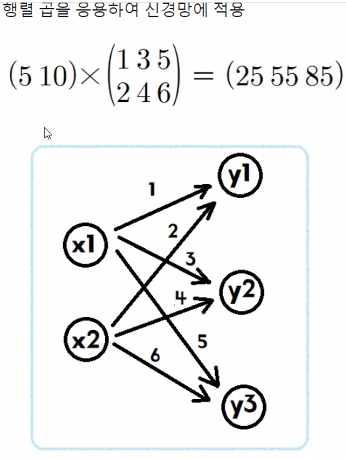

### 텐서의 조작(Manipulations)

- 인덱싱(Indexing): Numpy처럼 인덱싱 형태로 사용가능

In [ ]:
x = torch.Tensor([[1,2],[3,4]])
print(x)

print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])
print(x[:,0])
print(x[:,1])
print(x[0,:])
print(x[1,:])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


- 랜덤한 값을 가지는 텐서 생성

```
      1. torch.rand() : 0과 1 사이의 숫자를 균등하게 생성

      2. torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

      3. torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

      4. torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

      5. torch.randint() : 주어진 범위 내의 정수를 균등하게 생성

      6. torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

      7. torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성
```

- 특정한 값을 가지는 텐서 생성

```
      1. torch.arange() : 주어진 범위 내의 정수를 순서대로 생성

      2. torch.ones() : 주어진 사이즈의 1로 이루어진 텐서 생성

      3. torch.zeros() : 주어진 사이즈의 0으로 이루어진 텐서 생성

      4. torch.ones_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

      5. torch.zeros_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

      6. torch.linspace() : 시작점과 끝점을 주어진 갯수만큼 균등하게 나눈 간격점을 행벡터로 출력

      7. torch.logspace() : 시작점과 끝점을 주어진 갯수만큼 로그간격으로 나눈 간격점을 행벡터로 출력
```
https://bigdatadiary0819.tistory.com/60

- view: 텐서의 크기나 모양을 변경 

```
      기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
      -1로 설정되면 계산을 통해 해당 크기 값을 유추
```

In [ ]:
x = torch.randn(4,5)
print(x.shape)
print(x.size())

torch.Size([4, 5])
torch.Size([4, 5])


In [ ]:
x = torch.FloatTensor([
    [1,2],
    [3,4],
    [5,6],
    [7,8]
])

#size를 활용한 텐서 사이즈 보기
print(x.size())
#shape를 활용한 텐서 사이즈 보기
print(x.shape)
#dim을 활용한 텐서 차원 확인
print(x.dim())
#1차원 사이즈 확인
print(x.size(0))
#2차원 사이즈 확인
print(x.shape[0])

torch.Size([4, 2])
torch.Size([4, 2])
2
4
4


In [ ]:
x = torch.randn(4,5)
print(x)
print()
y = x.view(20)
print(y)
print()
z = x.view(5, -1)
print(z)

tensor([[-0.5764, -0.0790, -1.2320, -2.4085, -0.3268],
        [ 0.7106,  0.6508, -1.0431,  1.2350,  0.7154],
        [ 1.0390,  0.1751, -0.4262,  1.2427,  0.8191],
        [ 1.6378, -0.0242,  0.2901,  0.0887,  0.8126]])

tensor([-0.5764, -0.0790, -1.2320, -2.4085, -0.3268,  0.7106,  0.6508, -1.0431,
         1.2350,  0.7154,  1.0390,  0.1751, -0.4262,  1.2427,  0.8191,  1.6378,
        -0.0242,  0.2901,  0.0887,  0.8126])

tensor([[-0.5764, -0.0790, -1.2320, -2.4085],
        [-0.3268,  0.7106,  0.6508, -1.0431],
        [ 1.2350,  0.7154,  1.0390,  0.1751],
        [-0.4262,  1.2427,  0.8191,  1.6378],
        [-0.0242,  0.2901,  0.0887,  0.8126]])


In [ ]:
print(x.shape)
print(y.shape)
print(z.shape)

torch.Size([4, 5])
torch.Size([20])
torch.Size([5, 4])


- item: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.3130])
-1.312957763671875
torch.float32


      스칼라값 하나만 존재해야 item() 사용 가능

In [ ]:
x = torch.randn(2)
print(x)
#print(x.item())
print(x.dtype)

tensor([-1.1303, -0.6264])
torch.float32


- squeeze: 차원을 축소(제거)

In [ ]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.7379, 0.9305, 0.8244],
         [0.9210, 0.6963, 0.9292],
         [0.5831, 0.1691, 0.9160]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.7379, 0.9305, 0.8244],
        [0.9210, 0.6963, 0.9292],
        [0.5831, 0.1691, 0.9160]])
torch.Size([3, 3])


- unsqueeze: 차원을 증가(생성)

In [ ]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.2375, 0.9752, 0.9625],
        [0.2635, 0.2089, 0.8398],
        [0.4852, 0.3117, 0.2923]])
torch.Size([3, 3])


In [ ]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.2375, 0.9752, 0.9625],
         [0.2635, 0.2089, 0.8398],
         [0.4852, 0.3117, 0.2923]]])
torch.Size([1, 3, 3])


In [ ]:
tensor = tensor.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[[0.2375, 0.9752, 0.9625]],

         [[0.2635, 0.2089, 0.8398]],

         [[0.4852, 0.3117, 0.2923]]]])
torch.Size([1, 3, 1, 3])


- stack: 텐서간 결합

In [ ]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)
print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


- cat: 텐서를 결합하는 메소드(concatenate)

      넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야함
      해당 차원을 늘려준 후 결합

In [ ]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c = torch.cat((a,b), dim=0)
print()
print(c)
print(c.size())

tensor([[[ 0.7950,  2.8916,  0.9488],
         [ 1.1342,  0.5710,  1.2718],
         [ 0.3840, -0.8615,  1.7817]]])
tensor([[[-1.0900, -0.6678, -1.1877],
         [-0.4919,  0.3525,  0.2529],
         [ 0.6708,  0.1193,  2.2237]]])

tensor([[[ 0.7950,  2.8916,  0.9488],
         [ 1.1342,  0.5710,  1.2718],
         [ 0.3840, -0.8615,  1.7817]],

        [[-1.0900, -0.6678, -1.1877],
         [-0.4919,  0.3525,  0.2529],
         [ 0.6708,  0.1193,  2.2237]]])
torch.Size([2, 3, 3])


In [ ]:
d = torch.cat((a,b), dim=1)
print(d)
print(d.size())

tensor([[[ 0.7950,  2.8916,  0.9488],
         [ 1.1342,  0.5710,  1.2718],
         [ 0.3840, -0.8615,  1.7817],
         [-1.0900, -0.6678, -1.1877],
         [-0.4919,  0.3525,  0.2529],
         [ 0.6708,  0.1193,  2.2237]]])
torch.Size([1, 6, 3])


- chunk: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [ ]:
tensor = torch.rand(3,6)
print(tensor)

t1,t2,t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.9792, 0.2656, 0.7868, 0.4777, 0.5574, 0.5916],
        [0.3559, 0.4959, 0.2228, 0.4808, 0.3366, 0.7777],
        [0.5706, 0.1547, 0.4900, 0.3159, 0.2013, 0.7924]])
tensor([[0.9792, 0.2656],
        [0.3559, 0.4959],
        [0.5706, 0.1547]])
tensor([[0.7868, 0.4777],
        [0.2228, 0.4808],
        [0.4900, 0.3159]])
tensor([[0.5574, 0.5916],
        [0.3366, 0.7777],
        [0.2013, 0.7924]])


- split: chunk과 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

      열방향으로 최대 2개를 가짐

In [ ]:
tensor = torch.rand(3,6)
t1, t2, t3 = torch.split(tensor, 2, dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.0521, 0.0770, 0.4965, 0.1920, 0.3111, 0.9687],
        [0.2587, 0.7179, 0.4480, 0.7629, 0.8626, 0.0064],
        [0.2666, 0.7073, 0.6214, 0.8320, 0.3814, 0.7668]])
tensor([[0.0521, 0.0770],
        [0.2587, 0.7179],
        [0.2666, 0.7073]])
tensor([[0.4965, 0.1920],
        [0.4480, 0.7629],
        [0.6214, 0.8320]])
tensor([[0.3111, 0.9687],
        [0.8626, 0.0064],
        [0.3814, 0.7668]])


- torch ↔ numpy

```
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함
```

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
print(a.to('cpu', torch.double))
print(type(a))

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
<class 'torch.Tensor'>


In [ ]:
b = a.numpy()
print(b)
print(type(b))

[1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [ ]:
a.add_(1) # a값에 1을 더해 줌
print(a)
print(type(a))
print(b)
print(type(b))

tensor([2., 2., 2., 2., 2., 2., 2.])
<class 'torch.Tensor'>
[2. 2. 2. 2. 2. 2. 2.]
<class 'numpy.ndarray'>


In [ ]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a) # a에 1을 더해서 a를 출력
print(a)
print(b) # cpu에서 메모리 공유

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
b=b.numpy()
np.add(b,2,out=b)

array([4., 4., 4., 4., 4., 4., 4.])

역전파 / 경사하강법

https://velog.io/@ssulee0206/%EC%97%AD%EC%A0%84%ED%8C%8C-%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95

## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

TORCH.AUTOGRAD를 사용한 자동 미분 <br>
https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html

`requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

In [ ]:
import torch
a = torch.randn(3,3)
# ,requires_grad=True)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[-3.2526,  0.4049,  0.8667],
        [-4.1472,  4.0076,  0.9612],
        [ 2.1829, -2.5668, -1.6587]])
False


`requires_grad_(...)`는 기존 텐서의 `requires_grad` 값을 바꿔치기(`in-place`)하여 변경

`grad_fn`: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

In [ ]:
a.requires_grad_(True) # _를 사용하면 inplace 연산. 바꾼값으로 계산
print(a.requires_grad)
b = (a*a).sum()
print(b)
print(b.grad_fn)

True
tensor(59.7832, grad_fn=<SumBackward0>)


### 기울기(Gradient)

In [ ]:
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후, `.backward()`를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적됨

In [ ]:
print(out)
out.backward() # backward를 통해서 역전파 계산이 가능

tensor(36., grad_fn=<MeanBackward0>)


`grad`: data가 거쳐온 layer에 대한 미분값 저장

In [ ]:
print(x)
print(x.grad) # 미분값

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [ ]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
  y = y * 2 
print(y)

tensor([ 163.0957,  667.3397, -803.1717], grad_fn=<MulBackward0>)


In [ ]:
# v 기준으로 backward 계산
v = torch.tensor([0.1,1.0,0.0001],dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [ ]:
v

tensor([1.0000e-01, 1.0000e+00, 1.0000e-04])

`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [ ]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


`detach()`: 내용물(content)은 같지만 `require_grad`가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x)
print(y)
# print(x.eq(y).all())

True
False
tensor([ 0.1593,  0.6517, -0.7843], requires_grad=True)
tensor([ 0.1593,  0.6517, -0.7843])


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print(a.data)
print(a.grad) # 계산한 것이 아무것도 없음
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


$b = a + 2$

In [ ]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


$c = b^2$ 

In [ ]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


a의 `grad_fn`이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

In [ ]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [ ]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


<ipython-input-34-7222c1aec66c>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(b.grad)


In [ ]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


<ipython-input-35-f6ca42a4f63f>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(c.grad)


In [ ]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


<ipython-input-36-85e75c577388>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(out.grad)


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [ ]:
import torch.nn as nn 

`nn.Linear` 계층 예제

https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1

dilation은 kernel의 한 픽셀에서 다른 픽셀 까지의 거리를 나타냅니다.

## FashionMNIST 분류 모델

GPU 설정

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### 데이터 로드

In [ ]:
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))]) # 평균, 표준편차

In [ ]:
trainset = datasets.FashionMNIST(root='/content/',
                                 train=True, download=True,
                                 transform=transform)
testset = datasets.FashionMNIST(root='/content/',
                                 train=False, download=True,
                                 transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [ ]:
!ls

drive  FashionMNIST  sample_data


In [ ]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2) # default 값은 0인데 data 로딩을 위해 몇 개의 서브 프로세스를 사용할 것인지를 결정
test_loader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [ ]:
# iter는 반복 가능한 객체에서 이터레이터를 반환하고, next는 이터레이터에서 값을 차례대로 꺼냄.
images, labels = next(iter(train_loader)) # 데이터의 접근하려면 python 의 내장함수 iter 와 next 을 사용하여 접근
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

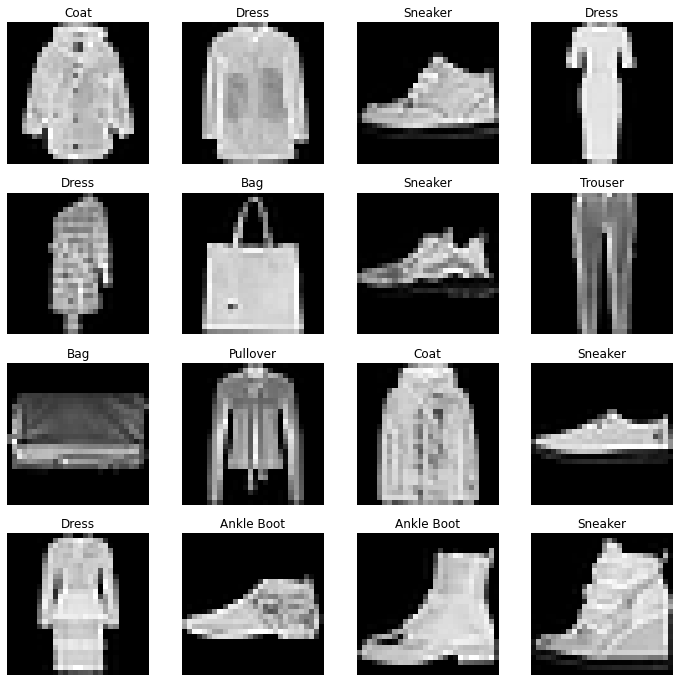

In [ ]:
import matplotlib.pyplot as plt
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',

}

figure = plt.figure(figsize=(12,12))
cols, rows = 4,4
for i in range(1,cols * rows + 1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image,cmap='gray')
plt.show()


### 모델 정의 및 파라미터

https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1

dilation은 kernel의 한 픽셀에서 다른 픽셀까지의 거리를 나타냅니다.

nn.Linear
- 선형 계층은 저장된 가중치와 편향을 사용하여 입력에 선형 변환을 적용하는 모듈

nn.ReLU
- 비선형 활성화는 모델의 입력과 출력 사이에 복잡한 관계를 만든다. 비선형 활성화는 선형 변환 후에 적용되어 비선형성을 도입하고 신경망이 다양한 현상을 학습할 수 있도록 만든다.

In [ ]:
from torch import nn
from torch.nn import functional as f
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv2d_32 = nn.Conv2d(1,32,3,padding=1)
        self.conv2d_64 = nn.Conv2d(32,64,3,padding=1)
        self.max2d     = nn.MaxPool2d(2,2)
        self.conv2d_128 = nn.Conv2d(64,128,3,padding=1)
        self.conv2d_256 = nn.Conv2d(128,256,3, stride = 2,padding=1)
        self.linear1    = nn.Linear(3*3*256, 256)
        self.linear2    = nn.Linear(256,64)
        self.linear3    = nn.Linear(64,10)
        self.batch2d1     = nn.BatchNorm2d(64)
        self.batch2d2    = nn.BatchNorm2d(256)
        self.batch1d     = nn.BatchNorm1d(64)
        self.drop      = nn.Dropout(p=0.3)
        self.flat      = nn.Flatten()
    
    def forward(self,x):
        x = x.view(-1,1,28,28)
        x = f.relu(self.conv2d_32(x))
        x = f.relu(self.conv2d_64(x))
        x = self.batch2d1(x)
        x = f.relu(self.max2d(x))
        x = self.drop(x)
        
        x = f.relu(self.conv2d_128(x))
        x = f.relu(self.conv2d_256(x))
        x = self.batch2d2(x)
        x = f.relu(self.max2d(x))
        x = self.drop(x)
        
        x = self.flat(x)
        x = f.relu(self.linear1(x))
        x = self.drop(x)
        x = f.relu(self.linear2(x))
        x = self.drop(x)
        x = self.batch1d(x)
        x = f.log_softmax(self.linear3(x), dim=1)
        return(x)

net = net()
print(net)

net(
  (conv2d_32): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_64): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_128): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_256): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear1): Linear(in_features=2304, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (batch2d1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch1d): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
)


In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

20
torch.Size([32, 1, 3, 3])


https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html


### 손실함수와 옵티마이저

In [ ]:
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.008)

### 모델 학습

배치수 확인

In [ ]:
total_batch = len(train_loader)  #배치 사이즈 128
print(total_batch)

469


- zero_grad()

```
보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데, 
한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 된다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 
이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안된다고 한다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 
반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.
```

In [ ]:
for epoch in range(10):
  running_loss = 0.0    #초기화
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()  #weight를 업데이트하는 시점

    running_loss += loss.item()
    if i% 100 == 99:
      print('Epoch:{}, iter:{}, Loss:{}'.format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

Epoch:1, iter:100, Loss:0.0484565466940403
Epoch:1, iter:200, Loss:0.02833840075135231
Epoch:1, iter:300, Loss:0.025395242616534232
Epoch:1, iter:400, Loss:0.022246812224388124
Epoch:2, iter:100, Loss:0.019742122530937194
Epoch:2, iter:200, Loss:0.01881475503742695
Epoch:2, iter:300, Loss:0.018711043179035186
Epoch:2, iter:400, Loss:0.01781781766563654
Epoch:3, iter:100, Loss:0.01642815424501896
Epoch:3, iter:200, Loss:0.016006023220717907
Epoch:3, iter:300, Loss:0.015881382413208484
Epoch:3, iter:400, Loss:0.01612324747443199
Epoch:4, iter:100, Loss:0.013798831529915333
Epoch:4, iter:200, Loss:0.014474632672965526
Epoch:4, iter:300, Loss:0.01415866619348526
Epoch:4, iter:400, Loss:0.014406778063625097
Epoch:5, iter:100, Loss:0.013842578619718552
Epoch:5, iter:200, Loss:0.013097070567309856
Epoch:5, iter:300, Loss:0.013413553096354008
Epoch:5, iter:400, Loss:0.01272561763972044
Epoch:6, iter:100, Loss:0.012581799648702145
Epoch:6, iter:200, Loss:0.012792052835226058
Epoch:6, iter:300, 

In [ ]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
net.parameters

<bound method Module.parameters of net(
  (conv2d_32): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_64): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_128): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_256): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear1): Linear(in_features=2304, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (batch2d1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch1d): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
  (flat): Flatten(start_dim=

In [ ]:
#모델 테스트
import numpy as np
def imshow(image):
  image = image / 2 + 0.5
  npimg = image.numpy()

  fig = plt.figure(figsize=(16,8))
  plt.imshow(np.traspose(npimg, (1,2,0)))   #rgb -> gbr
  plt.show()

In [ ]:
import torchvision

images, labels = next(iter(test_loader))

imshow(torchvision.utils.make_grid(images[:6]))

In [ ]:
#예시, 하나 뽑아본 것
import torch
import torch.nn as nn

data = torch.randn((5,5))
print(data)
print(torch.max(data, dim=1))

In [ ]:
outputs = net(images)
print(outputs)
_,predicted = torch.max(outputs, 1)
print(predicted)

In [ ]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print(100*correct/total)

### keras로 수행하기

https://codetorial.net/tensorflow/fashion_mnist

In [ ]:
import tensorflow as tf

#1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images[0])
print(train_labels[0])

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Cross Entropy 종류

https://peterleeeeee.github.io/categorical_cross_entropy/

In [ ]:
#2. 데이터 전처리
train_images, test_images = train_images/255.0, test_images/255.0

In [ ]:
#3. 모델 구성
def model():
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(256, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(512, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(10)
  ])

#4. 모델 컴파일
  #SparseCategoricalCrossentropy() 정수로 된 label을 주면 내부적으로 알아서 loss를 계산
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
  return model

In [ ]:
model = model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       73984     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 512)         1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 512)        0

In [ ]:
#5. 모델 훈련
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 17s 4ms/step - loss: 0.5285 - accuracy: 0.8062
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3431 - accuracy: 0.8734
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2910 - accuracy: 0.8923
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2523 - accuracy: 0.9063
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2222 - accuracy: 0.9177
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1976 - accuracy: 0.9261
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1761 - accuracy: 0.9344
Epoch 8/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1569 - accuracy: 0.9413
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1413 - accuracy: 0.9467
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1

In [ ]:
#6. 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.6457 - accuracy: 0.8945
0.6457156538963318 0.8945000171661377


In [ ]:
#7. 예측하기
import numpy as np
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

313/313 [==============================] - 1s 2ms/step
[ -85.20918  -149.97021  -123.40786   -86.141075 -102.81372   -25.072838
  -83.70427   -19.837492  -86.70947    29.331793]
9


In [ ]:
len(predictions)

10000